In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
# Цель: проанализировать данные для понимания структуры
# Проверить свои гипотезы/предположения, посмотреть, какие факторы влияют на выживаемость

import pandas as pd #библиотека для работы с таблицами, структурой dataframe
import numpy as np #библиотека для работы с матрицами, выш. мат.
import seaborn as sns #библиотека для визуализации данных
import matplotlib.pyplot as plt #библиотека для работы с анализом данных, таблицами
%matplotlib inline

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
Titanic



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**PassengerId** - идентификатор пассажира

**Survived** - выжил/не выжил

**Pclass** - класс билета

**Name** - имя пассажира

**Sex** - пол

**Age** - возраст

**SibSp** - количество братьев/сестер/супругов на борту

**Parch** - количество родителей/детей на борту

**Ticket** - номер билета

**Fare** - стоимость билета

**Cabin** - номер каюты

**Embarked** - порт посадки


In [ ]:
Titanic.info()

In [20]:
# Изменяю имена столбцов на более мне понятные

Titanic = Titanic.rename(columns = {'SibSp' : 'SiblingsSpou',
                         'PassengerId' : 'PassengerID'})

In [ ]:
# Матрица корреляции помогает понять, какие переменные стоит учитывать при анализе.

numeric_columns = Titanic.select_dtypes(include=[np.number]).columns


Titanic_numeric = Titanic[numeric_columns].copy()
Titanic_numeric = Titanic_numeric.dropna()  

correlation_matrix = Titanic_numeric.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True, 
            fmt='.2f')

plt.title('Матрица корреляции', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
Titanic.isnull().sum()

In [ ]:
# По данным из интернета, средний возраст пассажира самолёта в 2025 ссоставляет 35-42 года. Узнаем, в нашем самолёте пассажиры среднестатистического возраста или нет. Найдём средний возраст пассажира из имеющихся данных.
mean_age = Titanic['Age'].mean()
print(mean_age)

if mean_age < 35:
    print(f"Вывод: в нашем самолёте пассажиры моложе, чем в большинстве случаев.")
elif 35 <= mean_age <= 42:
    print(f"Вывод: в нашем самолёте пассажиры среднестатистического возраста.")
else:
    print(f"Вывод: в нашем самолёте пассажиры старше, чем в большинстве случаев.")

In [ ]:
Titanic.describe()

In [ ]:
# По статистике в 2025 году чаще всего на борту самолёта встречается пассажир с возрастом 32 года. Предполагаю, что самый частовстречающийся возраст на борту нашего самолёта меньше среднестатистического. Создадим график и узнаем.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Age'].dropna(), bins=50)
plt.title('Возраст пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Самый частовстречающийся возраст на борту нашего самолёта в районе 19 лет. Я был прав.

In [ ]:
# Предполагаю, что на борту с таким количеством пассажиров были женщины, которые имели уникальное имя среди всех женщин в самолёте, таких женщин было больше 40.  


women = Titanic[Titanic['Sex'] == 'female'].copy()
women['FirstName'] = women['Name'].str.split(',').str[1].str.split('.').str[1].str.strip()
women['FirstName'] = women['FirstName'].str.split().str[0]
name_counts = women['FirstName'].value_counts()

unique_names_count = (name_counts == 1).sum()

print(f"Количество уникальных имён среди женщин: {unique_names_count}")

if unique_names_count > 40:
    print(f"Я был прав")
else:
    print(f"Я был не прав")

In [ ]:
# Предполагаю, что мужчин и женщин на борту примерно поровну, максимальный разброс 100 человек.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Sex'].dropna(), bins=3)
plt.title('Пол пассажиров')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Женщин немного больше 300, а мужчин значительно больше 500. Я был не прав.

In [ ]:
# Думаю, что большинство пассажиров не выжило.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
survived_statistics = Titanic['Survived'].value_counts()
total_passengers = len(Titanic)
death_statistics = (survived_statistics[0] / total_passengers) * 100
survival_statistics = (survived_statistics[1] / total_passengers) * 100

plt.figure(figsize=(16, 9))
plt.hist(Titanic['Survived'].dropna(), bins=10)
plt.title('График выживаемости')
plt.xlabel('Выживаемость (0 - не выжил, 1 - выжил)')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

if survived_statistics[0] > survived_statistics[1]:
    print(f"Большинство пассажиров не выжило. Я был прав.")
else:
    print(f"Большинство пассажиров выжило. Я был не прав.")

In [ ]:
Titanic.sort_values(by='Age')

In [ ]:
Table = Titanic.groupby(['Sex'], as_index=False) \
      .agg({'Survived': 'mean'}) \
      .sort_values('Survived', ascending=False)

Table.head(2)

In [ ]:
# Я думаю, что низких и средних по стоимости билетов поровну, а дорогих значительно меньше.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Fare'].dropna(), bins=30)
plt.title('График стоимости билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Практически все билеты низкие по стоимости. Средних по цене(в районе 200-300) билетов очень мало. Дорогих единицы. Я был не прав.

# Проверим гипотезу: люди, у которых не было родственников на борту, выживали чаще

In [ ]:
Titanic['HasRelatives'] = (Titanic['SiblingsSpou'] + Titanic['Parch']) > 0

groups_ordered = [False, True]
group_labels = ['Без родственников', 'С родственниками']

total_counts = Titanic['HasRelatives'].value_counts().reindex(groups_ordered)
survived_counts = Titanic[Titanic['Survived'] == 1]['HasRelatives'].value_counts().reindex(groups_ordered)
total_counts = total_counts.fillna(0)
survived_counts = survived_counts.fillna(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.pie(total_counts.values, labels=group_labels, autopct='%1.1f%%')
ax1.set_title('Все пассажиры', fontsize=14, fontweight='bold')
ax2.pie(survived_counts.values, labels=group_labels, autopct='%1.1f%%')
ax2.set_title('Выжившие', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Гипотеза не подтвердилась. люди, у которых не было родственников на борту, выживали реже.**

# Проверим гипотезу: пассажиры с более высоким классом билета имели больший шанс выжить

In [ ]:
class1_data = Titanic[Titanic['Pclass'] == 1]
class3_data = Titanic[Titanic['Pclass'] == 3]

class1_total = len(class1_data)
class1_survived = len(class1_data[class1_data['Survived'] == 1])
class1_survival_rate = class1_survived / class1_total

class3_total = len(class3_data)
class3_survived = len(class3_data[class3_data['Survived'] == 1])
class3_survival_rate = class3_survived / class3_total

classes = ['1-й класс', '3-й класс']
survival_rates = [class1_survival_rate, class3_survival_rate]
total_passengers = [class1_total, class3_total]
survived_counts = [class1_survived, class3_survived]

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
bars1 = plt.bar(classes, survival_rates, alpha=0.7)
plt.ylabel('Доля выживших')
plt.title('Процент выживших по классам', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, rate in zip(bars1, survival_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
x = np.arange(len(classes))
width = 0.35

bars2_1 = plt.bar(x - width/2, total_passengers, width, label='Всего пассажиров', alpha=0.7)
bars2_2 = plt.bar(x + width/2, survived_counts, width, label='Выжило', alpha=0.7)

plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.title('Абсолютные значения по классам', fontsize=14, fontweight='bold')
plt.xticks(x, classes)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, count in zip(bars2_1, total_passengers):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')
for bar, count in zip(bars2_2, survived_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Гипотеза подтвердилась. Пассажиры с более высоким классом билета имели больший шанс выжить.**

# **Проверим гипотезу: в процентном соотношении дети выживали чаще, чем взрослые**

In [ ]:
children_data = Titanic[Titanic['Age'] < 18]
adults_data = Titanic[Titanic['Age'] >= 18]

children_total = len(children_data)
children_survived = len(children_data[children_data['Survived'] == 1])
children_survival_rate = children_survived / children_total

adults_total = len(adults_data)
adults_survived = len(adults_data[adults_data['Survived'] == 1])
adults_survival_rate = adults_survived / adults_total

groups = ['Дети', 'Взрослые']
survival_rates = [children_survival_rate, adults_survival_rate]
total_passengers = [children_total, adults_total]
survived_counts = [children_survived, adults_survived]

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
bars1 = plt.bar(groups, survival_rates, alpha=0.7, color=['lightcoral', 'steelblue'])
plt.ylabel('Доля выживших')
plt.title('Процент выживших', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, rate in zip(bars1, survival_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
x = np.arange(len(groups))
width = 0.35

bars2_1 = plt.bar(x - width/2, total_passengers, width, label='Всего пассажиров', alpha=0.7, color=['lightcoral', 'steelblue'])
bars2_2 = plt.bar(x + width/2, survived_counts, width, label='Выжило', alpha=0.7, color=['red', 'darkblue'])

plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.title('Абсолютные значения по возрастным группам', fontsize=14, fontweight='bold')
plt.xticks(x, groups)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, count in zip(bars2_1, total_passengers):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')
for bar, count in zip(bars2_2, survived_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Гипотеза подтвердилась. В процентном соотношении дети выживали чаще, чем взрослые**

# Векторизация

In [ ]:
categorical_cols = Titanic.select_dtypes(include=['object']).columns
label_encoders = {}

In [ ]:
categorical_cols

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    Titanic[col] = le.fit_transform(Titanic[col])
    label_encoders[col] = le

In [ ]:
Titanic.info()

In [ ]:
Titanic.isnull().sum()

In [ ]:
Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

In [ ]:
Titanic.isnull().sum()

In [ ]:
Titanic.info()

In [ ]:
X = Titanic.drop(columns=['Survived'])
y = Titanic['Survived']

In [ ]:
Titanic['Age'].unique()

In [ ]:
X

In [ ]:
Titanic['Survived'].value_counts()

In [ ]:
Titanic.corr()

In [ ]:
np.var(Titanic['Sex'])

In [ ]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

In [ ]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [ ]:
model_loaded.predict(X_test)

In [ ]:
Titanic['AgeGroup'] = pd.cut(Titanic['Age'], 
                             bins=[0, 12, 18, 35, 60, 100], 
                             labels=['Child', 'Teenager', 'Young', 'Middle', 'Old'])

print(Titanic['AgeGroup'].value_counts().sort_index())

In [ ]:
Titanic['Sex_Class'] = Titanic['Sex'].astype(str) + '_' + Titanic['Age'].astype(str)
print(Titanic['Sex_Class'].value_counts().sort_index())

In [ ]:
# Давайте узнаем первые две буквы в именах первых десяти пассажиров в таблице. Ранее колонка Name была преобразована в числовой тип, поэтому буквы - это цифры в данном случае.

Titanic['The_First_Two_Letters'] = Titanic['Name'].astype(str).str[:2]
print("Первые две буквы из имен первых 10 пассажиров:")
print(Titanic['The_First_Two_Letters'].head(10))

In [ ]:
# Полагаю, что пассажиры чаще выживали во 2-м классе, чем в 3-м. Проверим это при помощи метода векторизации "бинарное кодирование"

Titanic['Class2_Survival'] = (Titanic['Pclass'] == 2).astype(int)
Titanic['Class3_Survival'] = (Titanic['Pclass'] == 3).astype(int)

survival_2 = Titanic[Titanic['Class2_Survival'] == 1]['Survived'].mean()
survival_3 = Titanic[Titanic['Class3_Survival'] == 1]['Survived'].mean()

if survival_2 > survival_3: 
    print("Пассажиры выживали чаще во 2-м классе. Моё предположение верное.") 
else:
    print("Пассажиры выживали чаще в 3-м классе. Моё предположение неверное.")

/tmp/ipykernel_38/2413424654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())
/tmp/ipykernel_38/2413424654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = X['Fare'].fillna(X['Fare'].median())
/tmp/ipykernel_38/2413424654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

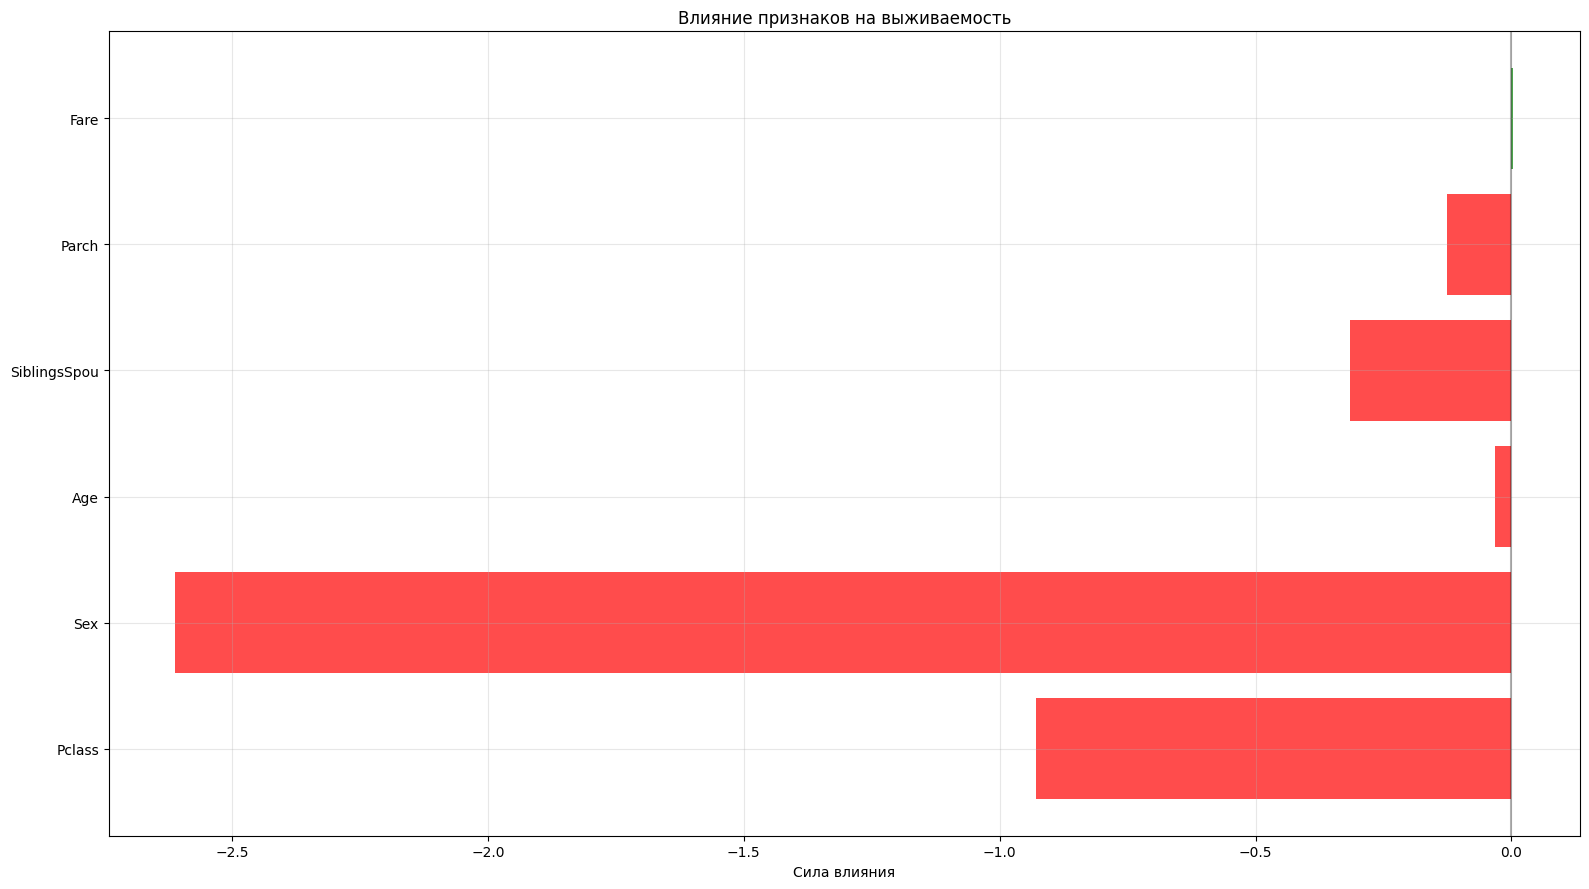

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features = ['Pclass', 'Sex', 'Age', 'SiblingsSpou', 'Parch', 'Fare']
X = Titanic[features]
y = Titanic['Survived']
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LogisticRegression(random_state=42, max_iter=1000)
linear_model.fit(X_train, y_train)

plt.figure(figsize=(16, 9))
coefficients = linear_model.coef_[0]
features_names = features

colors = ['green' if x > 0 else 'red' for x in coefficients]
plt.barh(features_names, coefficients, color=colors, alpha=0.7)
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.title('Влияние признаков на выживаемость')
plt.xlabel('Сила влияния')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

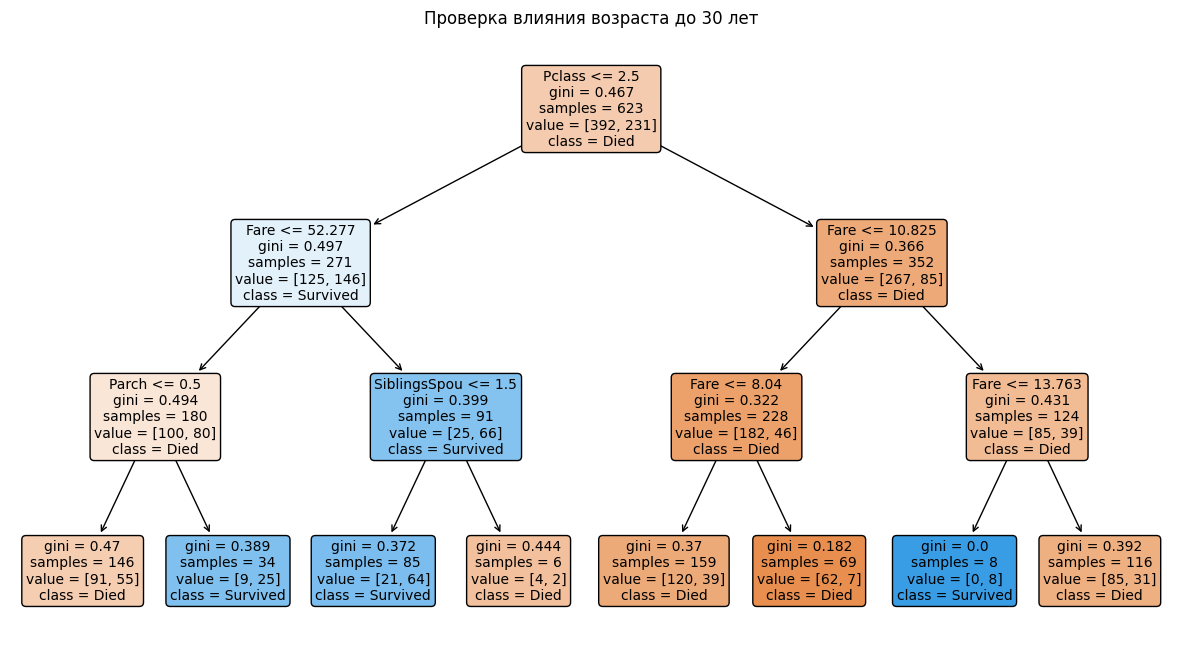

In [24]:
# Создадим дерево о влиянии возраста до 30 лет на выживаемость

from sklearn.tree import DecisionTreeClassifier, plot_tree


Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].median())

Titanic['Age_under_30'] = (Titanic['Age'] < 30).astype(int)

available_columns = Titanic.columns.tolist()

features = ['Pclass', 'Age_under_30', 'SiblingsSpou', 'Parch', 'Fare']

if 'Sex' in available_columns:
    Titanic = pd.get_dummies(Titanic, columns=['Sex'], drop_first=True)
    features.append('Sex_male')

if 'Embarked' in available_columns:
    Titanic = pd.get_dummies(Titanic, columns=['Embarked'], drop_first=True)
    features.extend(['Embarked_Q', 'Embarked_S'])

X = Titanic[features]
y = Titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(tree, 
          feature_names=features,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Проверка влияния возраста до 30 лет')
plt.show()

In [57]:
# Создадим модель "модификация градиентного бустинга" и определим её точность

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# При помощи модели выясним, какой признак самый важный для выживаемости

importance = gb_model.feature_importances_

for feature, imp in zip(features, importance):
    print(f"• {feature}: {imp:.1%}")

The_most_important_idx = importance.argmax()
The_most_important_feature = features[The_most_important_idx]
The_most_important_value = importance[The_most_important_idx]

if The_most_important_feature == 'Pclass':
    print("Класс билета - главный фактором выживания")
elif The_most_important_feature == 'Age':
    print("Возраст - главный фактором выживания")
else:
    print("Стоимость билета - главный фактором выживания")

# Анализ ошибок

cm = confusion_matrix(y_test, y_pred)
print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Accuracy: 0.726
• Pclass: 27.3%
• Age: 29.5%
• Fare: 43.2%
Стоимость билета - главный фактором выживания
Анализ ошибок: ложные 'выжил' - 5, ложные 'погиб' - 44


In [56]:
# Создадим модель "нейронная сеть" и определим её точность

from sklearn.neural_network import MLPClassifier

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_model = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=42
)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_nn:.3f}")

# При помощи модели выясним, дети до 12 лет выживали чаще остальных(люди возрастом 12 лет и старше) или нет

Titanic['IsChild'] = (Titanic['Age'] < 12).astype(int)

child_survival = Titanic[Titanic['IsChild'] == 1]['Survived'].mean()
adult_survival = Titanic[Titanic['IsChild'] == 0]['Survived'].mean()

print(f"Дети до 12 лет: {child_survival:.1%} выживших")
print(f"Люди возрастом 12 лет и старше: {adult_survival:.1%} выживших")

if child_survival > adult_survival:
    print("Дети до 12 лет выживали чаще. Гипотеза верна.")
else:
    print("Дети до 12 лет выживали реже. Гипотеза неверна.")

# Анализ ошибок

cm = confusion_matrix(y_test, y_pred_nn)
print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Accuracy: 0.737
Дети до 12 лет: 57.4% выживших
Люди возрастом 12 лет и старше: 36.8% выживших
Дети до 12 лет выживали чаще. Гипотеза верна.
Анализ ошибок: ложные 'выжил' - 11, ложные 'погиб' - 36


In [54]:
# Я выбрал модель "градиентный бустинг", сделаем кросс-валидацию

from sklearn.model_selection import cross_val_predict

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

model = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)

print("Кросс-валидация градиентного бустинга (5 фолдов):")

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Средняя точность: {mean_score:.3f} (+/- {std_score:.3f})")
print(f"Фолды: {[f'{s:.3f}' for s in scores]}")

model.fit(X, y)

print(f"Итоговый вывод: разброс между фолдами: {std_score:.3f} - модель устойчивая. Точность модели {mean_score:.1%}.")

# Анализ ошибок

y_pred_cv = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred_cv)

print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Кросс-валидация градиентного бустинга (5 фолдов):
Средняя точность: 0.720 (+/- 0.052)
Фолды: ['0.631', '0.691', '0.742', '0.764', '0.770']
Итоговый вывод: разброс между фолдами: 0.052 - модель устойчивая. Точность модели 72.0%.
Анализ ошибок: ложные 'выжил' - 78, ложные 'погиб' - 172
